In [50]:
import numpy as np
from math import floor
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython import display
from matplotlib.animation import FuncAnimation
from matplotlib.animation import Animation
from IPython.display import HTML

In [51]:
def RK4(f, x, t, h):
    """
    Given a function f(x,t) and
    scalars x, t, and h, return x(t+h)
    """
    
    k1 = h*f(x, t)
    k2 = h*f(x + (1/2)*k1, t + (1/2)*h)
    k3 = h*f(x + (1/2)*k2, t + (1/2)*h)
    k4 = h*f(x + k3, t + h)
    
    return x + (1/6)*(k1 + 2*k2 + 2*k3 + k4)


In [52]:
# Plot Jupiter's known orbit and saturn with constant step size

Msun = 1.9891e30
Mjup, Rjup, Vjup = 1.89e27, 778e9, 13.07e3
Msat, Rsat, Vsat = 5.683e26, 1.4e12, 9.6e3
Mear, Rear, Vear = 5.972e24, 149.6e9, 30e3
Mpro, Rpro, Vpro = 721.9, 6371e3 + Rear, 8e3
G = 6.6738e-11

def f(r, t):
    xe, ye, dxdte, dydte, xj, yj, dxdtj, dydtj, xs, ys, dxdts, dydts, xp, yp, dxdtp, dydtp = r
    
    fxe = -G*Msun*xe / np.sqrt(xe**2 + ye**2)**3 + -G*Mjup*(xe - xj) / np.sqrt((xe - xj)**2 + (ye - yj)**2)**3 + -G*Msat*(xe - xs) / np.sqrt((xe - xs)**2 + (ye - ys)**2)**3
    fye = -G*Msun*ye / np.sqrt(xe**2 + ye**2)**3 + -G*Mjup*(ye - yj) / np.sqrt((xe - xj)**2 + (ye - yj)**2)**3 + -G*Msat*(ye - xs) / np.sqrt((xe - xs)**2 + (ye - ys)**2)**3
    
    fxj = -G*Msun*xj / np.sqrt(xj**2 + yj**2)**3 + -G*Mear*(xj - xe) / np.sqrt((xe - xj)**2 + (ye - yj)**2)**3 + -G*Msat*(xj - xs) / np.sqrt((xj - xs)**2 + (yj - ys)**2)**3
    fyj = -G*Msun*yj / np.sqrt(xj**2 + yj**2)**3 + -G*Mear*(yj - ye) / np.sqrt((xe - xj)**2 + (ye - yj)**2)**3 + -G*Msat*(yj - ys) / np.sqrt((xj - xs)**2 + (yj - ys)**2)**3
  
    fxs = -G*Msun*xs / np.sqrt(xs**2 + ys**2)**3 + -G*Mjup*(xs - xj) / np.sqrt((xs - xj)**2 + (ys - yj)**2)**3 + -G*Mear*(xs - xe) / np.sqrt((xe - xs)**2 + (ye - ys)**2)**3
    fys = -G*Msun*ys / np.sqrt(xs**2 + ys**2)**3 + -G*Mjup*(ys - yj) / np.sqrt((xs - xj)**2 + (ys - yj)**2)**3 + -G*Mear*(ys - ye) / np.sqrt((xe - xs)**2 + (ye - ys)**2)**3
    
    fxp = -G*Msun*xp / np.sqrt(xp**2 + yp**2)**3 + -G*Mjup*(xp - xj) / np.sqrt((xp - xj)**2 + (yp - yj)**2)**3 + -G*Mear*(xp - xe) / np.sqrt((xp - xe)**2 + (yp - ye)**2)**3 + -G*Msat*(xp - xs) / np.sqrt((xp - xs)**2 + (yp - ys)**2)**3
    fyp = -G*Msun*yp / np.sqrt(xp**2 + yp**2)**3 + -G*Mjup*(yp - yj) / np.sqrt((xp - xj)**2 + (yp - yj)**2)**3 + -G*Mear*(yp - ye) / np.sqrt((xp - xe)**2 + (yp - ye)**2)**3 + -G*Msat*(yp - ys) / np.sqrt((xp - xs)**2 + (yp - ys)**2)**3
    
    return np.array([dxdte, dydte, fxe, fye, dxdtj, dydtj, fxj, fyj, dxdts, dydts, fxs, fys, dxdtp, dydtp, fxp, fyp])

h = 86400 # one day
t_values = np.arange(0, 9.2896e8 + h, h)

xe, ye, dxdte, dydte = 0, Rear, -Vear, 0
xj, yj, dxdtj, dydtj = 0, Rjup, -Vjup, 0
xs, ys, dxdts, dydts = 0, Rsat, -Vsat, 0
xp, yp, dxdtp, dydtp = 0, Rpro, 0, Vpro

ear_x = []
ear_y = []
jup_x = []
jup_y = []
sat_x = []
sat_y = []
pro_x = []
pro_y = []

progress = display.ProgressBar(len(t_values))
progress.display()

for t in t_values:
    ear_x.append(xe)
    ear_y.append(ye)
    
    jup_x.append(xj)
    jup_y.append(yj)
    
    sat_x.append(xs)
    sat_y.append(ys)
    
    pro_x.append(xp)
    pro_y.append(yp)
    
    progress.progress += 1
    
    r = (xe, ye, dxdte, dydte, xj, yj, dxdtj, dydtj, xs, ys, dxdts, dydts, xp, yp, dxdtp, dydtp)
    xe, ye, dxdte, dydte, xj, yj, dxdtj, dydtj, xs, ys, dxdts, dydts, xp, yp, dxdtp, dydtp = RK4(f, r, t, h)
    

[============================================================] 10753/10753

In [53]:
print(ear_y[0])

149600000000.0


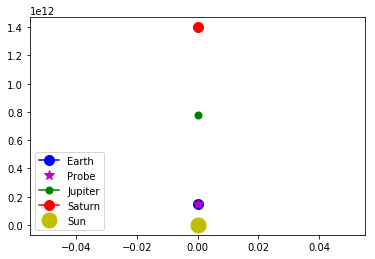

In [54]:
plt.plot(ear_x[0], ear_y[0], 'bo-', markersize = 10, label = 'Earth')
plt.plot(pro_x[0], pro_y[0], 'm*', markersize = 10, label = 'Probe')
plt.plot(jup_x[0], jup_y[0], 'go-', markersize = 7, label = 'Jupiter')
plt.plot(sat_x[0], sat_y[0], 'ro-', markersize = 10, label = 'Saturn')

plt.plot(0, 0, 'yo', markersize = 15, label = 'Sun')

plt.legend(loc = 'lower left')
plt.show()

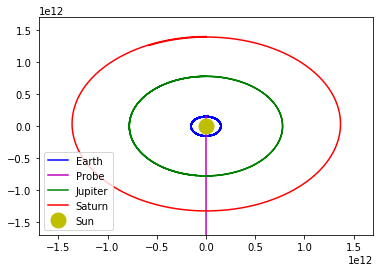

In [55]:
plt.plot(ear_x, ear_y, 'b-', markersize = 10, label = 'Earth')
plt.plot(pro_x, pro_y, 'm-', markersize = 10, label = 'Probe')
plt.plot(jup_x, jup_y, 'g-', markersize = 7, label = 'Jupiter')
plt.plot(sat_x, sat_y, 'r-', markersize = 10, label = 'Saturn')

plt.plot(0, 0, 'yo', markersize = 15, label = 'Sun')
plt.xlim(-1.7e12, 1.7e12); plt.ylim(-1.7e12, 1.7e12)
plt.legend(loc = 'lower left')
plt.show()

In [56]:
fig = plt.figure(figsize = (10, 10))

plt.plot(0, 0, 'yo', markersize = 15, label = 'Sun')
plt.plot(ear_x, ear_y, 'b-', markersize = 10, label = 'Earth')
plt.plot(pro_x, pro_y, 'm-', markersize = 10, label = 'Probe')
plt.plot(jup_x, jup_y, 'g-', markersize = 7, label = 'Jupiter')
plt.plot(sat_x, sat_y, 'r-', markersize = 10, label = 'Saturn')

line1, = plt.plot([], 'bo', markersize = 8, label = 'Earth')
line2, = plt.plot([], 'go', markersize = 8, label = 'Jupiter')
line3, = plt.plot([], 'ro', markersize = 8, label = 'Saturn')
line4, = plt.plot([], 'm*', markersize = 8, label = 'Probe')

plt.xlim(-1.7e12, 1.7e12); plt.ylim(-1.7e12, 1.7e12)
plt.legend(loc = 'lower left')

progress = display.ProgressBar(len(t_values))
progress.display()

def animate(frame):
    
    line1.set_data(ear_x[frame*10], ear_y[frame*10])
    line2.set_data(jup_x[frame*10], jup_y[frame*10])
    line3.set_data(sat_x[frame*10], sat_y[frame*10])
    line4.set_data(pro_x[frame*10], pro_y[frame*10])
    
    progress.progress += 10
    
    return line1, line2, line3, line4
    
anim = FuncAnimation(fig, animate, frames = len(ear_x) // 10, interval = 20)
plt.close()
HTML(anim.to_html5_video())

[============================================================] 10760/10753

In [8]:
# Input and Constants +++++++++++++++++++++++++++++++++++++++++++++++
K = 1         # constant of proportionality

t_max = 3.76e8 + 20000            # max simulation time

nt = 20000            # number of time steps

# ********************************************************************
#  Setup and initialize variables
# ********************************************************************
v_0x = 0         # initial velcoity: x cpt.
v_0y = 36e3         # initial velcoity: y cpt.
x0 = 0                   # initial displacement: x cpt.
y0 = 149598023e3 - v_0y*(0.81*(t_max // 2))                    # initial displacement: y cpt.

t = np.arange(0, (3.741e8+h) // 2, h)             # time
dt = t[1] - t[0]                              # time step 

# PLANET --------------------------------------------------------------
# Select planet stationary or moving by commenting / uncommenting code
xP0 = x_values[0]; yp0 = y_values[0]  # Planet Moving

xP = x_values
yP = y_values

print(len(xP))
Rd = np.zeros(len(t))
vx = np.zeros(len(t))
vy = np.zeros(len(t))
ax = np.zeros(len(t))
ay = np.zeros(len(t))
v = np.zeros(len(t))

x = np.zeros(len(t))
y = np.zeros(len(t))
xd = np.zeros(len(t))

# ********************************************************************
#  Calculations
# ********************************************************************


x[0] = x0; y[0] = y0;
xd[0] = x[0] - xP[0];
Rd[0] = np.sqrt(xd[0]**2 + y[0]**2);
vx[0] = v_0x; vy[0] = v_0y;

ax[0] = -(K / np.abs(Rd[0])**3) * xd[0];
ay[0] = -(K / np.abs(Rd[0])**3) * y[0];

x[1] = x[0] + vx[0] * dt + 0.5 * ax[0] * dt**2;
y[1] = y[0] + vy[0] * dt + 0.5 * ay[0] * dt**2;

xd[1] = x[1] - xP[1];
Rd[1] = np.sqrt(xd[1]**2 + y[1]**2);

vx[1] = vx[0] + ax[0] * dt;
vy[1] = vy[0] + ay[0] * dt;

# time steps 3, 4, 5, ....
for c in range(2, len(t)):
    x[c] = -K*dt**2*xd[c-1]/Rd[c-1]**3 + 2*x[c-1] - x[c-2]
    y[c] = -K*dt**2*y[c-1]/Rd[c-1]**3 + 2*y[c-1] - y[c-2]
    xd[c] = x[c] - xP[c]
    Rd[c] = np.sqrt(xd[c]**2 + y[c]**2)


# velocity ----------------------------------------------------------
R = x + 1j * y;
v[0] = 3
v[1:] = np.diff(R)/dt

# energy
ET = -100*np.ones(len(t))
EK = v**2
EP = ET - EK

NameError: name 'x_values' is not defined

In [ ]:
fig1 = plt.figure()

# Plot: x, y trajectory
x_p = np.real(R);     # x data for plot
y_p = np.imag(R);     # y data for plot
ns = nt / 50;
title_x = 'x position  (a.u.)';
title_y = 'y position  (a.u.)';

plt.plot(x_p, y_p, 'c.', label = "Satellite")
plt.plot(xP, yP, 'm.', label = "Planet")
plt.xlabel(title_x);
plt.ylabel(title_y);
#plt.axis([-10, 10, -10, 10])
plt.legend()

plt.show()

In [ ]:
fig = plt.figure()
plt.xlim(-0.1e10, 0.1e10)
plt.ylim(0.75e10, 0.85e10)

line1, = plt.plot([], 'o-', color = 'm', label = 'planet')
line2, = plt.plot([], 's-', color = 'c', label = 'satellite')

plt.legend()

def animate(frame):
    
    line1.set_data(xP[frame*10], yP[frame*10])
    line2.set_data(x_p[frame*10], y_p[frame*10])
    
    return line1, line2
    
anim = FuncAnimation(fig, animate, frames = len(x) // 10, interval = 50)
plt.close()
HTML(anim.to_html5_video())